In [5]:
import pandas as pd
import numpy as np

import nltk
import re

nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

from textblob import TextBlob
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\valiavee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
book = pd.read_csv('amazon_reviews.csv')
book

,stars,comment
0,2.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I have bro...
1,5.0 out of 5 stars,"\n\n\n\n\n\n\n\n\n\n \n \n \n So, I woul..."
2,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I bought s...
3,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n First let ...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Perfect as...
...,...,...
1195,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Overheatin...
1196,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Battery li...
1197,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Nice produ...
1198,3.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Network sp...


In [8]:
corpus = []
ps = PorterStemmer()

In [23]:
for i in range(0, len(book)):
    review = re.sub('[^a-zA-Z]', ' ',str(book.comment[i]))
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
review
corpus

['brought phone first day launch expect someth better could involv mobil liter wast phone get heat issu speak call appx min start see hand pain issu use phone within week feel heavi use better look less weight phone work',
 'would start kid look game phone still casual game one also casual use like youtub video stream actual fine samsung good build softwar qualiti mean display sound speed featur give annoy feel way look hand feel devic good quit boxi sleek grip well glass bodi textur overal would say zero complaint want safe secur nd phone mainli call bank purpos actual avoid chines brand samsung amaz featur overal product qualiti note face fingerprint scanner realli fast camera fine processor work fast',
 'bought samsung mobil last week mobil speaker work good mobil speaker low audibl speak call want replac amazon technician said good work book anoth inspect feel dissappoint dont buy product amazon return replac polici bad',
 'first let give review mobil bought gb version overal good 

In [35]:
sent_df = pd.DataFrame(corpus, columns=['comment'])
sent_df['comment']

0       brought phone first day launch expect someth b...
1       would start kid look game phone still casual g...
2       bought samsung mobil last week mobil speaker w...
3       first let give review mobil bought gb version ...
4                          perfect per specif given price
                              ...                        
9635       overh problem within day purchas dnt buy phone
9636            batteri life good u improv camera qualiti
9637                                         nice product
9638              network speed slow compar earlier mobil
9639                                  camera qualiti good
Name: comment, Length: 9640, dtype: object

In [41]:
def sentiment_analysis(ds):
    sentiment = TextBlob(str(ds['comment'])).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

sent_df[['subjectivity','polarity']] = sent_df.apply(sentiment_analysis, axis=1)
sent_df

,comment,subjectivity,polarity
0,brought phone first day launch expect someth b...,0.350000,0.270833
1,would start kid look game phone still casual g...,0.495052,0.070052
2,bought samsung mobil last week mobil speaker w...,0.446667,0.140000
3,first let give review mobil bought gb version ...,0.481640,0.051159
4,perfect per specif given price,1.000000,1.000000
...,...,...,...
9635,overh problem within day purchas dnt buy phone,0.000000,0.000000
9636,batteri life good u improv camera qualiti,0.600000,0.700000
9637,nice product,1.000000,0.600000
9638,network speed slow compar earlier mobil,0.450000,-0.150000


In [48]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
sent_df["analysis"] = sent_df["polarity"].apply(analysis)

sent_df

,comment,subjectivity,polarity,analysis
0,brought phone first day launch expect someth b...,0.350000,0.270833,Positive
1,would start kid look game phone still casual g...,0.495052,0.070052,Positive
2,bought samsung mobil last week mobil speaker w...,0.446667,0.140000,Positive
3,first let give review mobil bought gb version ...,0.481640,0.051159,Positive
4,perfect per specif given price,1.000000,1.000000,Positive
...,...,...,...,...
9635,overh problem within day purchas dnt buy phone,0.000000,0.000000,Neutral
9636,batteri life good u improv camera qualiti,0.600000,0.700000,Positive
9637,nice product,1.000000,0.600000,Positive
9638,network speed slow compar earlier mobil,0.450000,-0.150000,Negative


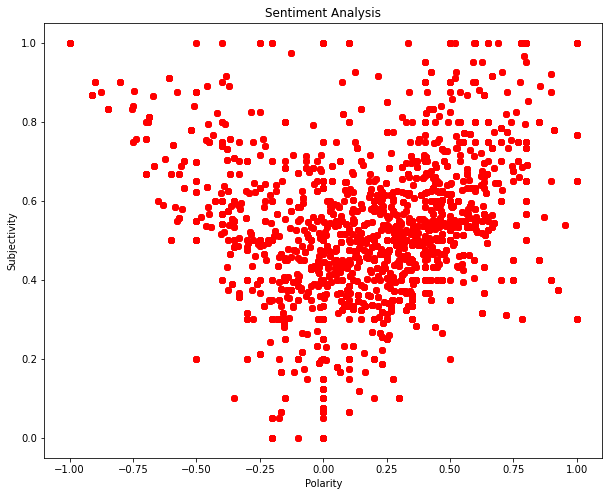

In [49]:
plt.figure(figsize=(10, 8))

for i in range(0, sent_df.shape[0]):
    plt.scatter(sent_df["polarity"][i], sent_df["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph